In [ ]:
from cleaned_data import aggregated
from sklearn.metrics import mean_absolute_error

y = aggregated["next_day_temperature_max"]
predictions = aggregated["temperature_2m_max"]

print(mean_absolute_error(y, predictions))

0       26.083895
1       25.479166
2       25.372917
3       25.439583
4       24.704168
          ...    
2918    27.489584
2919    27.716667
2920    27.745834
2921    27.943750
2922    28.175001
Name: temperature_2m_mean, Length: 2923, dtype: float64
0.7840006844626968


In [ ]:
# Now let's try a linear regression model
from sklearn.linear_model import LinearRegression


X = aggregated[
    [
        "temperature_2m_max",
        "relative_humidity_2m",
        "precipitation",
        "wind_speed_10m",
        "surface_pressure",
    ]
]
y = aggregated["next_day_temperature_max"]
model = LinearRegression()
model.fit(X, y)

predictions = model.predict(X)
print(mean_absolute_error(y, predictions))
print(y.head(10))
print(predictions[:10])

0.7240046613051926
0    32.80
1    33.05
2    33.15
3    31.45
4    30.25
5    30.90
6    30.90
7    30.85
8    29.80
9    30.95
Name: next_day_temperature_max, dtype: float64
[32.55879753 32.63527979 32.73138857 32.61512165 31.46465906 30.37175535
 30.77215429 30.72134561 30.66018071 29.85835891]


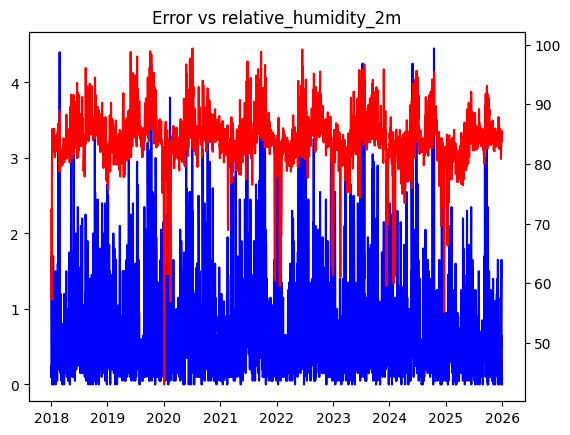

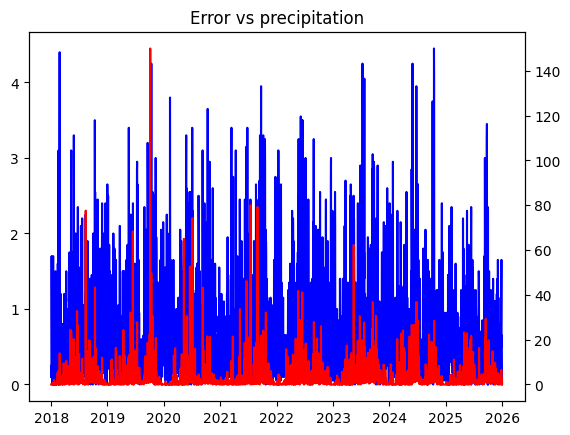

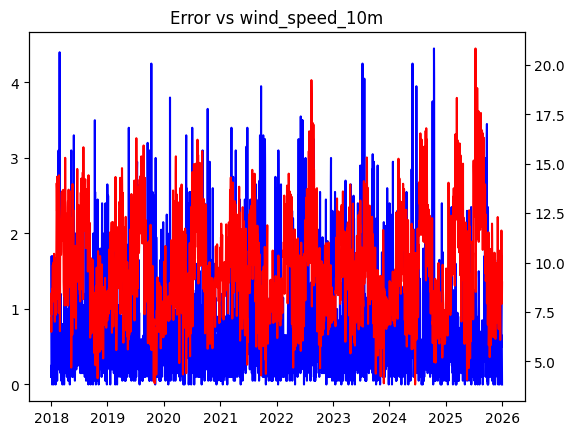

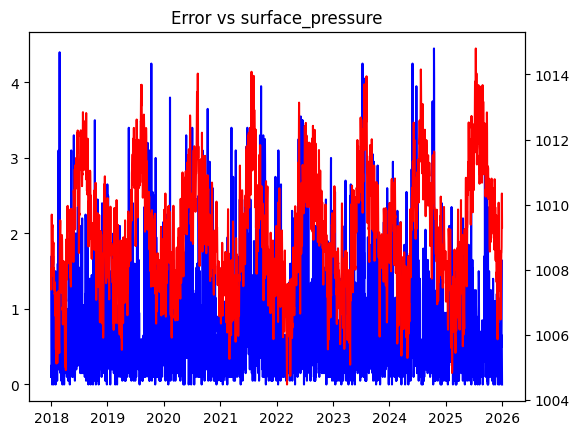

In [4]:
# Let's try to display daily error now
from matplotlib import pyplot as plt

error = abs(aggregated["temperature_2m_max"] - aggregated["next_day_temperature_max"])

for column in aggregated.columns:
    if column == "date" or "temperature" in column:
        continue

    fig, ax = plt.subplots()
    ax.plot(aggregated["date"], error, "b-")

    ax2 = ax.twinx()
    ax2.plot(aggregated["date"], aggregated[column], "r-")
    plt.title(f"Error vs {column}")

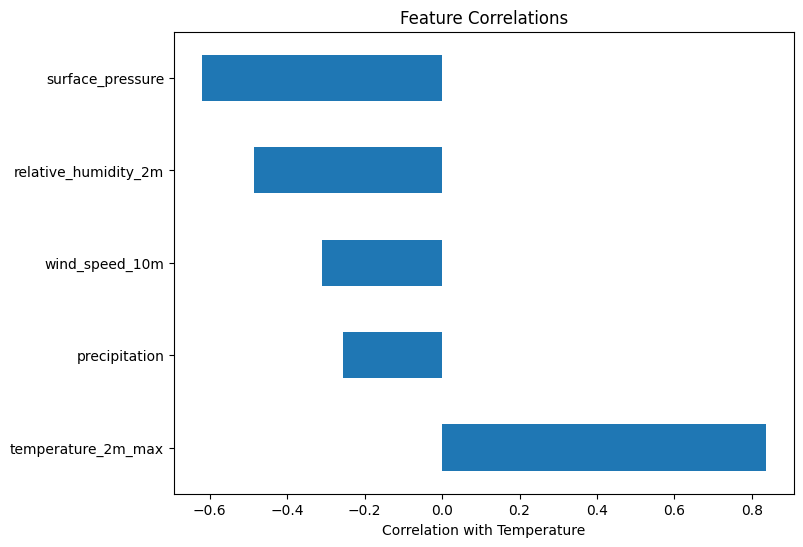

In [5]:
import seaborn as sns

# Correlation with target
correlations = X.corrwith(y).sort_values(ascending=False)

plt.figure(figsize=(8, 6))
correlations.plot(kind="barh")
plt.xlabel("Correlation with Temperature")
plt.title("Feature Correlations")
plt.show()